In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.spatial import distance
import operator

#create dataset
data_frame = pd.DataFrame(np.random.rand(1000,6)*100,columns = list('ABCDEF')).astype(int)
labels = pd.DataFrame(np.random.rand(1000,1)>0.5,columns=list('L')).astype(int)
frames = [data_frame,labels]
dataset = pd.concat(frames,axis =1)

#split dataset
split_criteria = np.random.rand(len(dataset))<0.80
train = dataset[split_criteria]
test = dataset[~split_criteria]

test_label = test[test.columns[-1:]].values.tolist()

train.to_csv("KNN-train.csv",index =False)
test.to_csv("KNN-test.csv",index = False)

#temp = train.plot.scatter(x='A',y='B',color = 'Red', label = "Train")
#test.plot.scatter(x='A',y='B',color = 'Blue', label = "Test" , ax=temp)

def knn(train,test,k):
    train.drop('L',axis=1)
    test.drop('L',axis=1)
    distances = []
    length = len(train)-1
    for x in range(len(train)):
        dist = distance.euclidean(train[x:x+1],test[0:1])
        distances.append((x,dist))
    distances.sort(key=operator.itemgetter(1))
    #print(distances)
    neighbours=[]
    for x in range(k):
        neighbours.append(distances[x][0])
    return neighbours

def predict(nbours):
    votes={}
    labels = np.array(train['L'])
    for x in range(len(nbours)):
        response = labels[nbours[x]]
        if response in votes:
            votes[response] += 1
        else:
            votes[response]=1
        sorted_votes = sorted(votes.items(),key = operator.itemgetter(1),reverse= True)
    return sorted_votes[0][0]
    


results = {}

for k in range(1,22):
    predicted_values=[]
    temp = 0
    for i in range(0,len(test)):
        predicted_values.append(predict(knn(train,test[i:i+1],k)))

    for j in range(0,len(test_label)):
        #print(test_label[0:1])
        #print(len(predicted_values))
        if(test_label[j] == predicted_values[j]):
            temp = temp+1
    results[k] = (float(temp)/len(test))*100


print("Accuracy of each k")
print("Format")
print("K : Percentage")
print(results)


Accuracy of each k
Format
K : Percentage
{1: 51.243781094527364, 2: 54.72636815920397, 3: 53.233830845771145, 4: 56.71641791044776, 5: 54.72636815920397, 6: 53.233830845771145, 7: 53.233830845771145, 8: 53.73134328358209, 9: 53.233830845771145, 10: 55.223880597014926, 11: 52.736318407960205, 12: 53.233830845771145, 13: 47.2636815920398, 14: 49.25373134328358, 15: 43.78109452736319, 16: 48.258706467661696, 17: 47.76119402985074, 18: 50.24875621890548, 19: 47.2636815920398, 20: 48.756218905472636, 21: 48.258706467661696}


In [69]:
from sklearn.neighbors import KNeighborsClassifier

trn = train
tst = test

train_label_ = []
train_label_col = np.array(train[train.columns[-1:]])

for i in range(0,len(train_label_col)):
    train_label_.append(train_label_col[i][0])

trn.drop('L',axis=1)
tst.drop('L',axis=1)

train_list = train.values.tolist()
test_list = test.values.tolist()

test_label_=[]
test_label_col = np.array(test[test.columns[-1:]])

for i in range(0,len(test_label_col)):
    test_label_.append(test_label_col[i][0])

predicted_labels= {}
for i in range(1,22):
    predicted = []
    temp=0
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(trn, train_label_)
    predicted =  knn.predict(tst)
    
    for j in range(0,len(test_label_)):
        if(test_label_[j]==predicted[j]):
            temp += 1
    
    predicted_labels[i] = (float(temp)/len(test_label_))*100
    
print(predicted_labels)



{1: 51.243781094527364, 2: 54.72636815920397, 3: 53.233830845771145, 4: 56.71641791044776, 5: 54.72636815920397, 6: 53.233830845771145, 7: 53.233830845771145, 8: 53.73134328358209, 9: 53.233830845771145, 10: 55.223880597014926, 11: 52.736318407960205, 12: 53.233830845771145, 13: 47.2636815920398, 14: 49.25373134328358, 15: 43.78109452736319, 16: 48.258706467661696, 17: 47.76119402985074, 18: 50.24875621890548, 19: 47.2636815920398, 20: 48.756218905472636, 21: 48.258706467661696}


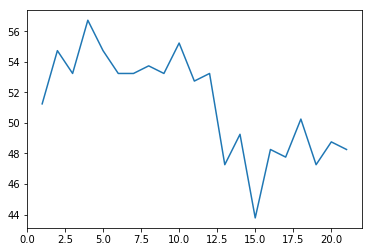

In [74]:
lists = sorted(results.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
#plt.close()
plt.show()

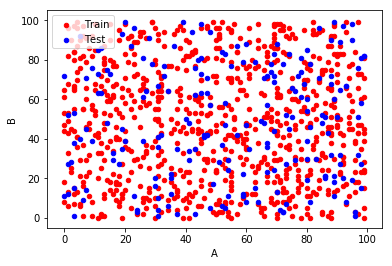

In [75]:
temp = train.plot.scatter(x='A',y='B',color = 'Red', label = "Train")
test.plot.scatter(x='A',y='B',color = 'Blue', label = "Test" , ax=temp)
plt.show()

"""
Since the data set is from a uniform distribution 
Therefore all the plots across different dimensions will look similar

"""